# Welcome to Exercise 5
In this exercise, you will learn how to visualize data using the Matplotlib and Seaborn libraries. Matplotlib is the fundamental plotting library in Python and gives you detailed control over every aspect of a figure, while Seaborn builds on top of it and provides high-level, statistically oriented visualizations with attractive default styles. Together, they form the core tools for data visualization in Python.

To complete the exercises, you can rely on two key reference sources. The [Matplotlib API reference](https://matplotlib.org/stable/api/index
) provides detailed explanations of all functions and options available in Matplotlib. The [Seaborn tutorial and reference guide](https://seaborn.pydata.org/tutorial.html
) offers structured learning material and examples that cover the full functionality of Seaborn. These resources contain all the information you need while working through the tasks in this exercise.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 - Create your first plot

For this task, you will work with small predefined numpy arrays. The goal is to get familiar with basic Matplotlib functionality.

### Implement the following steps:
1. Plot the data using Matplotlib’s `plot()` function.  
2. Add axis labels:  
   - x-axis: `"x values"`  
   - y-axis: `"y values"`  
3. Add a title: `"Linear Function: y = 0.5x + 2"`  
4. Change the line style to a dashed red line.  
5. Add a grid to the plot.  

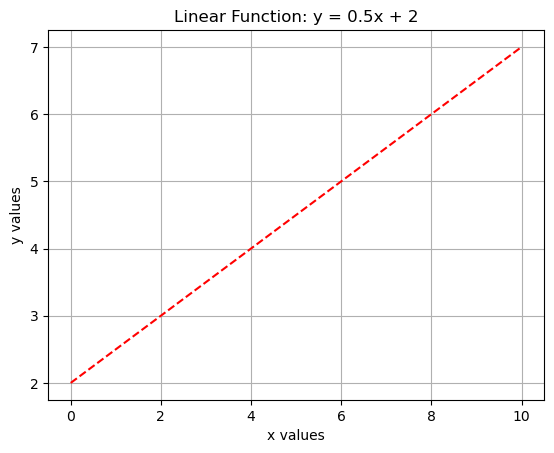

In [3]:
# Dataset
x = np.linspace(0, 10, 50)
y = 0.5 * x + 2

### Your code here ###

plt.plot(x,y, color="r", ls="--")
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Linear Function: y = 0.5x + 2")
plt.grid()
plt.show()

## Task 2
In this task, your goal is to recreate this plot about simulated runtimes of sorting algorithms using Seaborn. Try to get your output as close as possible to the plot shown:
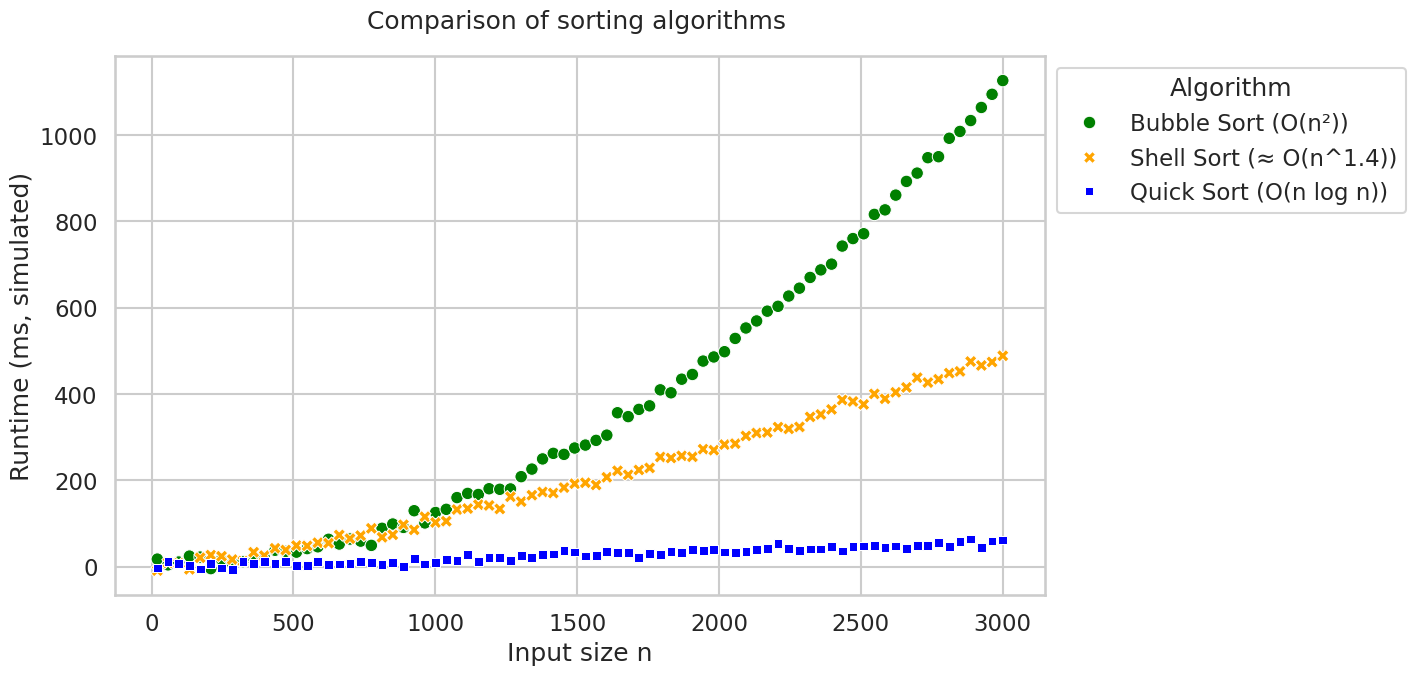

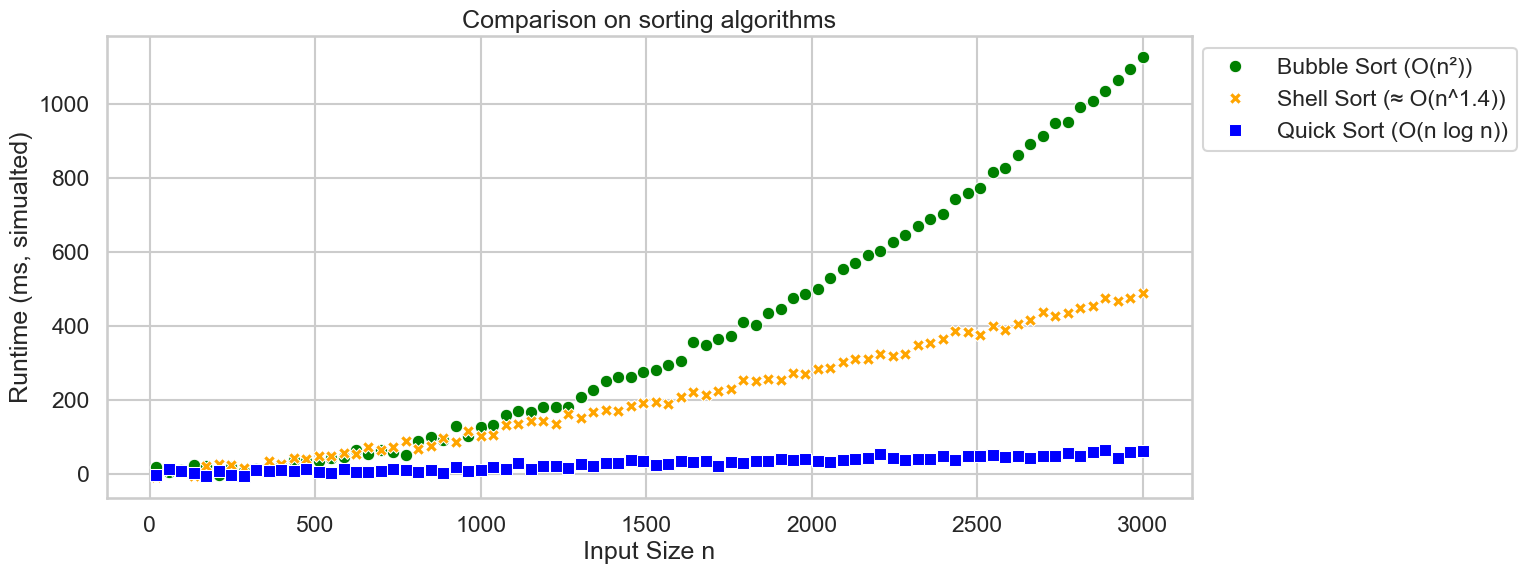

In [51]:
np.random.seed(0)
n = np.linspace(20, 3000, 80)

runtime_bubble = (n**2) / 8000 + np.random.normal(scale=10, size=len(n))
runtime_shell = (n**1.4) / 150 + np.random.normal(scale=8, size=len(n))
runtime_quick = (n * np.log2(n)) / 600 + np.random.normal(scale=6, size=len(n))

df = pd.DataFrame({
    "n": np.concatenate([n, n, n]),
    "runtime": np.concatenate([runtime_bubble, runtime_shell, runtime_quick]),
    "Algorithm": (["Bubble Sort (O(n²))"]  * len(n) +
                  ["Shell Sort (≈ O(n^1.4))"] * len(n) +
                  ["Quick Sort (O(n log n))"] * len(n))
})

markers = {
    "Bubble Sort (O(n²))": "o",
    "Shell Sort (≈ O(n^1.4))": "X",
    "Quick Sort (O(n log n))": "s"
}

palette = {
    "Bubble Sort (O(n²))": "green",   # red
    "Shell Sort (≈ O(n^1.4))": "orange",  # orange
    "Quick Sort (O(n log n))": "blue"   # blue
}

# Seaborn-Theme
sns.set_theme(style="whitegrid", context="talk", palette="deep")

### Your code here ###

# Create figure and axes
# Scatter plot: visualize runtimes for different algorithms

plt.figure(figsize=(14, 6))  # ← wider figure


sns.lineplot(
    
    data=df,
    x="n",
    y="runtime",
    hue="Algorithm",
    style="Algorithm",
    markers=markers,
    ls="",       
    dashes=False,
    palette=palette
)

# Add title and axis labels
plt.xlabel("Input Size n")
plt.ylabel("Runtime (ms, simualted)")
plt.title("Comparison on sorting algorithms")


# Move the legend slightly outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

## Task 3
Now we want to build a ridgeline chart showing us the Age-distribution of the different classes. For that first we need to sort the titanic-dataframe with the classes.

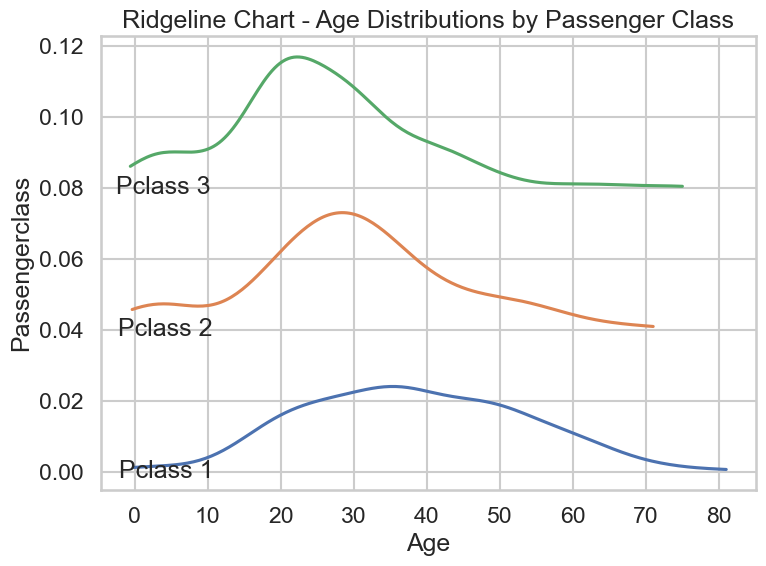

In [62]:
from scipy.stats import gaussian_kde

# import the titanic dataset
ti = pd.read_csv("titanic.csv")

### your code here ###
# delete not necessary columns
df = ti.drop(["Survived", "Name", "Sex", "SibSp", "Parch", "Ticket", "Fare"], axis=1)

# sort Pclass with .unique() and sort them

classes = np.sort(df["Pclass"].unique())

### Do not change following code ###
plt.figure(figsize=(8, 6))

offset = 0.04 # this va dis lue can be imagined as the height between the ridgelines

# iterate over each passenger class
for i, c in enumerate(classes):
    values = df[df["Pclass"] == c]["Age"]

    ### your code here ###
    ### hint: look up the functions gaussian_kde and np.linspace
    # compute the KDE of the age value
    values = df[df["Pclass"] == c]["Age"].dropna()
    kde = gaussian_kde(values)
    x = np.linspace(values.min() - 1, values.max() + 1, 200)
    y = kde(x)   

    # vertical offset between the ridgelines
    y_shifted = y + i * offset

    # draw ridgeline with .plot()
    plt.plot(x,y_shifted)

    ### your code here ###
    ### hint: use plt.text(x,y) to put labels Pclass 1, Pclass 2 and Pclass 3 on the plots
    # labeling
    plt.text(
    x.min() - 2,
    i * offset,
    f"Pclass {c}",
    va="center"
    )

### Do not change following code ###
plt.title("Ridgeline Chart - Age Distributions by Passenger Class")
plt.xlabel("Age")
plt.ylabel("Passengerclass")
plt.tight_layout()
plt.show()


## Task 4 - Heatmap
In this task, you will analyze the Titanic dataset using Pandas and Seaborn. Your goal is to visualize the relationships between the numerical variables in the dataset by creating a correlation heatmap.
1. Import the Titanic dataset
2. Filter out all numeric columns
3. Calculate the correlation matrix of these variables (.corr())
4. Create a heatmap from this using Seaborn
    - Display the values (annot=True)
    - Use a meaningful color scheme (e.g., “coolwarm” or "rocket")
    - Add a title

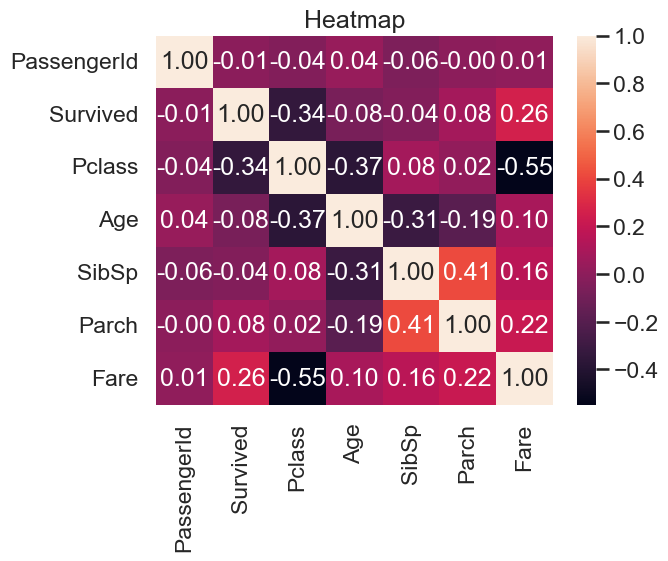

<Figure size 1000x800 with 0 Axes>

In [75]:

# import titanic dataset
ti = pd.read_csv("titanic.csv")

# Filter out all numeric columns
numeric_df = ti.select_dtypes(include='number')


# Calculate the correlation matrix of these variables
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="rocket", fmt=".2f")
plt.title("Heatmap")


# Plot
plt.figure(figsize=(10, 8))
plt.show()



## Task 5 - Titanic survivors
Build a plot using seaborn with a barplot that shows the survivors seperated by gender in percent.

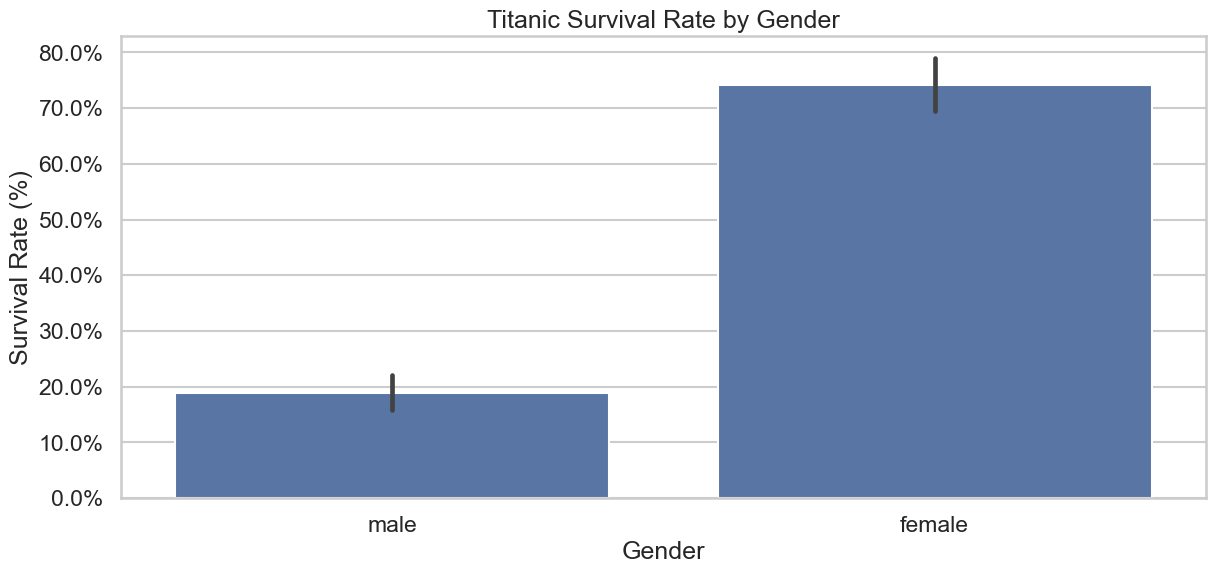

In [78]:

### Your code here ###
# import titanic dataset
ti = pd.read_csv("titanic.csv")

sns.set_theme(style="whitegrid", context="talk", palette="deep")

plt.figure(figsize=(14, 6))  # ← wider figure

sns.barplot(
    data=ti,
    x="Sex",
    y="Survived",
)

plt.ylabel("Survival Rate (%)")
plt.xlabel("Gender")
plt.title("Titanic Survival Rate by Gender")

# Convert y-axis to percent
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.1f}%'))

plt.show()


## Task 6 - Titanic survivors and their age
In this task we want to plot a 3-dimensional plot, like the plot in task 3 only with the age added in the z-axis. Use in this task the matplotlib bar3d function.
``` Hint: Look which input-parameters ax.bar3d(...) needs. This could help: https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html#sphx-glr-gallery-mplot3d-3d-bars-py.
The input arrays must look like this:
x:  [0 0 0 0 0 0 0 1 1 1 1 1 1 1]
y:  [-1  0  1  2  3  4  5 -1  0  1  2  3  4  5]
z:  [ 61.29032258  73.91304348  75.30864198  83.63636364  67.74193548 ... ]

In [97]:
# Create Age Bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 80, 100]
ti['AgeGroup'] = pd.cut(ti['Age'], bins=age_bins, right=False)

# Group Data
# observed=False ensures we get rows for empty age bins (returns NaN, which we fill with 0)
survival_group = ti.groupby(['Pclass', 'Sex', 'AgeGroup'], observed=False)['Survived'].mean() * 100
survival_group = survival_group.fillna(0)

/var/folders/gr/rf1yb1r12056l5tfpgkcm87r0000gn/T/ipykernel_98672/3562202515.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


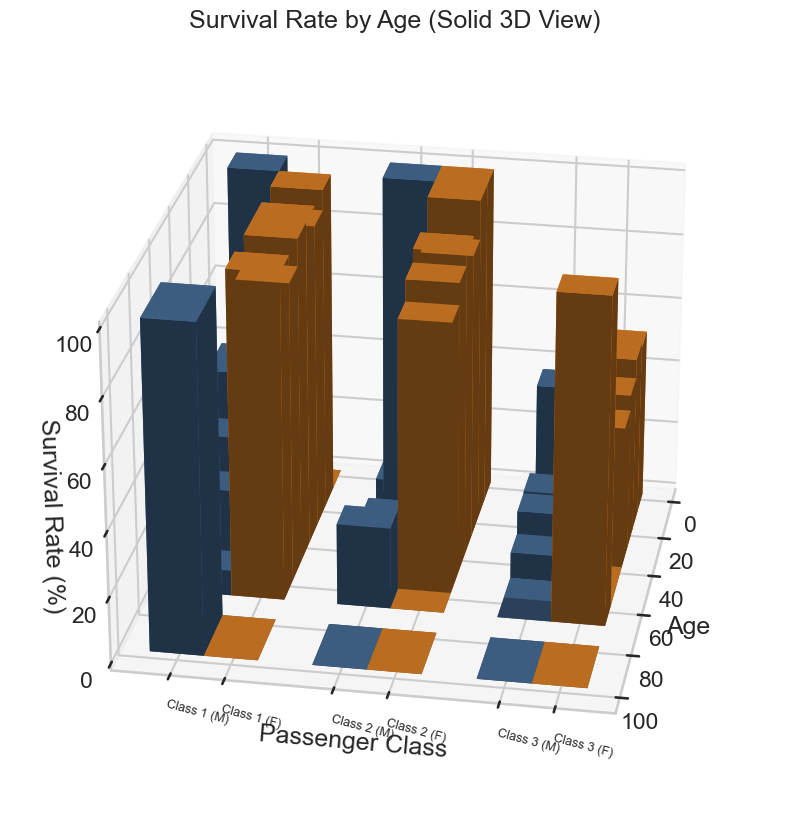

In [109]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 80, 100]
ti['AgeGroup'] = pd.cut(ti['Age'], bins=age_bins, right=False)

# Calculate survival rates
# observed=False ensures we keep empty bins (returns NaN which we fill with 0)
survival_data = ti.groupby(['Pclass', 'Sex', 'AgeGroup'], observed=False)['Survived'].mean() * 100
survival_data = survival_data.fillna(0)

# 2. CREATE BAR3D INPUTS
x_pos, y_pos, z_pos = [], [], []
dx, dy, dz = [], [], []
colors = []

# Color mapping
c_map = {'male': '#4E79A7', 'female': '#F28E2B'} 

# Define Y-positions. 
# We keep a small gap between *Classes* (e.g., gap between 1 and 3) to differentiate them,
# but we will make the bars within a row solid.
y_mapping = {
    (1, 'male'): 0, (1, 'female'): 1,
    (2, 'male'): 3, (2, 'female'): 4,
    (3, 'male'): 6, (3, 'female'): 7
}

for pclass in [1, 2, 3]:
    for sex in ['male', 'female']:
        group_data = survival_data.loc[pclass, sex]
        
        for interval, rate in group_data.items():
            # X: Start of age bin
            x_pos.append(interval.left)
            
            # Y: Row position
            y_pos.append(y_mapping[(pclass, sex)])
            
            # Z: Start at 0
            z_pos.append(0)
            
            # dx: WIDTH = 10 (Matches bin size exactly => No gaps between age bars)
            if interval.left == 80: # The last bin (80-100) is 20 years wide
                dx.append(20)
            else:
                dx.append(10)
            
            # dy: DEPTH = 1 (Makes the row distinct and solid)
            dy.append(1)
            
            # dz: HEIGHT = Survival Rate
            dz.append(rate)
            
            # Color
            colors.append(c_map[sex])

# 3. PLOTTING
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# edgecolor='none' removes the lines around the bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, shade=True, edgecolor='none')

# 4. FORMATTING
ax.set_xlabel('Age')
ax.set_ylabel('Passenger Class')
ax.set_zlabel('Survival Rate (%)')
ax.set_title('Survival Rate by Age (Solid 3D View)')

# Custom Y-ticks to label the rows
yticks_pos = [0.5, 1.5, 3.5, 4.5, 6.5, 7.5]
yticks_labels = [
    'Class 1 (M)', 'Class 1 (F)', 
    'Class 2 (M)', 'Class 2 (F)', 
    'Class 3 (M)', 'Class 3 (F)'
]
ax.set_yticks(yticks_pos)
ax.set_yticklabels(yticks_labels, fontsize=9, rotation=-15, ha='left')

# Set view angle 
ax.view_init(elev=25, azim=10)

plt.tight_layout()
plt.savefig("fig.pdf")
plt.savefig("fig.svg")
plt.savefig("fig.png")
plt.show()

## Task 7 - import as png
Export the plot from task 6 as a png, pdf and svg.

In [ ]:
### your code here ###


<Figure size 640x480 with 0 Axes>